# Chapter 2: Convolutional Neural Networks

Set up the seeds so the results are reproducible:

In [1]:
import random
random.seed(2)

import tensorflow as tf
tf.random.set_seed(2)

import numpy as np
np.random.seed(2)

### Your Task:

Worldwide Pizza Co.'s packaging is legendary. It's the only pizza company that has different shapes of boxes, depending on your order. A 5-piece wings meal comes in a star-shaped box; fries come in a circle-shaped box, and mozzarella sticks in a triangle one.

For now, the box-manufacturing company manually sorts the boxes. They saw that you were featured in a recent company newsletter about AI-solutions and have reached out for your help. They have some cameras on the production line and have sent you pictures of the boxes that they produce. Here are the four types:

- Stars
- Circles
- Squares
- Triangles

They said that they could install a system to automatically push boxes in the right direction if you could create a solution that can successfully detect them. Ready to work your magic?

### Understand the Data

Your new task involves using image data. Keras already has built-in helper functions that allow you to read the images so you'll use that automatically:

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Set up your working directory where the data is:

In [3]:
working_dir = 'datasets/shapes'

In [4]:
classes = ['circle', 'square', 'star', 'triangle']

In [5]:
data_generator = ImageDataGenerator(validation_split=0.2)

In [6]:
training_generator = data_generator.flow_from_directory(
    working_dir, 
    classes=classes, 
    batch_size=100,
    subset='training',
    color_mode='grayscale'
)

Found 11981 images belonging to 4 classes.


In [7]:
validation_generator = data_generator.flow_from_directory(
    working_dir, 
    classes=classes, 
    batch_size=100,
    subset='validation',
    color_mode='grayscale'
)

Found 2994 images belonging to 4 classes.


Now check the images to see how they look like:

In [8]:
import matplotlib.pyplot as plt

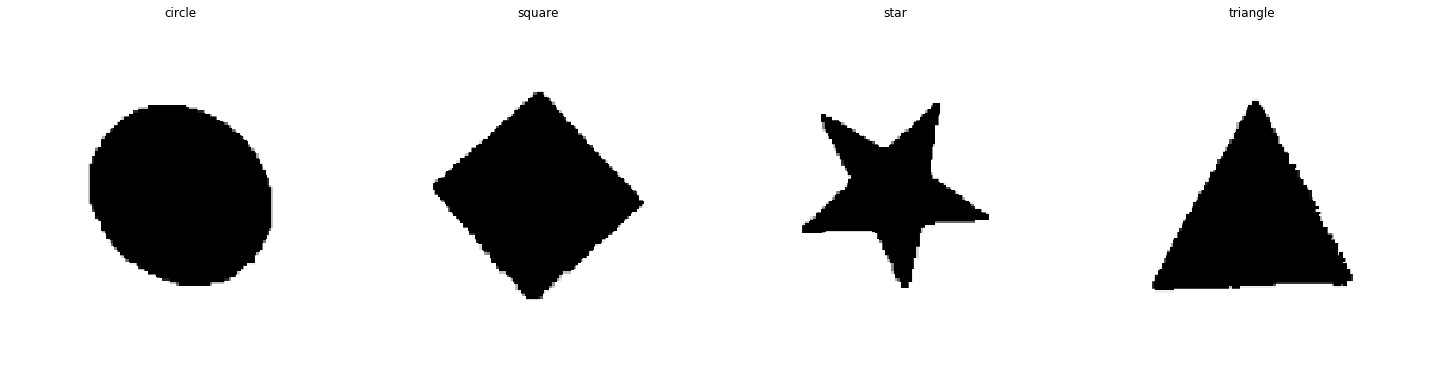

In [9]:
images, labels = training_generator.next()

fig, axes = plt.subplots(1, 4, figsize=(20,20))
axes = axes.flatten()

axes_idx = 0
for one_hot_label in range(4):
    for image, label in zip(images, labels):
        if label[one_hot_label] == 1:
            ax = axes[axes_idx]
            ax.imshow(image[:,:,0], cmap='Greys_r')
            ax.axis('off')
            ax.set_title(classes[one_hot_label])
            axes_idx += 1
            break
            
plt.tight_layout()
plt.show()

Not the prettiest images in the world, black and white and with rough edges, but you will be able to help them.

How is the image stored?

In [10]:
first_image_in_batch = images[0]

In [11]:
image_shape = first_image_in_batch.shape
print(image_shape)

(256, 256, 1)


It has 256 pixels x 256 pixels. We can also see that when we plot it:

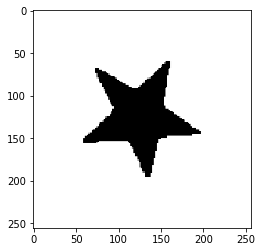

In [12]:
plt.imshow(first_image_in_batch[:,:,0], cmap='Greys_r')

Inside the machine, the image was read in a single table of 256 rows and 256 columns. Values are stored between 0 and 255. 0 is typically black, and 255 is white. Take a look:

In [13]:
print(first_image_in_batch[:,:,0])

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


Printed above are only the edges which we know are white - this is the reason why they have the value 255.

### Set Up Your First Convolutional Neural Network

Start by importing Conv2D from keras.layers:

In [14]:
from keras.layers import Conv2D

Using TensorFlow backend.


Even small filters have proven to be very powerful at extracting information such as lines so you use a filter of 5 by 5 and 'relu' activation. Add 16 of them:

In [15]:
convolutional_layer = Conv2D(16, (5, 5), activation='relu', input_shape=image_shape)

Reduce the sizes of the resulting images/tables by using a Max Pooling Filter:

In [16]:
from keras.layers import MaxPool2D

In [17]:
max_pool_layer = MaxPool2D()

Your convolutional layers have now captured information from neighboring pixels, and your pooling layers have downsampled that data. You can now flatten the results of the max pool layer into a single vector.

In [18]:
from keras.layers import Flatten

In [19]:
flatten_layer = Flatten()

Create a dense layer to receive the flattened data and act as the output. Use softmax as activation for the final layer as you have multiple mutually exclusive outputs:

In [20]:
from keras.layers import Dense

In [21]:
dense_layer = Dense(4, activation='softmax')

Finally, build the model:

In [22]:
from keras.models import Sequential

cnn_model = Sequential([
        convolutional_layer,
        max_pool_layer,
        flatten_layer,
        dense_layer
])

In [23]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 252, 252, 16)      416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 16)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 254016)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1016068   
Total params: 1,016,484
Trainable params: 1,016,484
Non-trainable params: 0
_________________________________________________________________


In [24]:
cnn_model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'],
)

In [25]:
history = cnn_model.fit(training_generator, epochs=5)

Epoch 1/5
120/120 [==============================] - 53s 443ms/step - loss: 617.4300 - accuracy: 0.8602
Epoch 2/5
120/120 [==============================] - 10s 81ms/step - loss: 0.2150 - accuracy: 0.9982
Epoch 3/5
120/120 [==============================] - 10s 80ms/step - loss: 0.0273 - accuracy: 0.9997
Epoch 4/5
120/120 [==============================] - 10s 80ms/step - loss: 0.0025 - accuracy: 0.9997
Epoch 5/5
120/120 [==============================] - 10s 80ms/step - loss: 0.0220 - accuracy: 0.9993


In [26]:
val_loss, val_acc = cnn_model.evaluate(validation_generator)

print(f"Evaluation result on Test Data : Loss = {val_loss}, accuracy = {val_acc}")

30/30 [==============================] - 4s 145ms/step
Evaluation result on Test Data : Loss = 0.0, accuracy = 0.9996659755706787


Awesome results! Congratulations on building your first CNN! The factory team is very impressed with your work!